In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\karlf\AppData\Local\Temp\ipykernel_15880\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
import pandas as pd

# Define the file path (you will set this later)
forward_bias_file_path = "Dataset_students_2026\Data_1mm_device\Cold_FET_forward_bias.s2p"
pinchoff_bias_file_path = "Dataset_students_2026\Data_1mm_device\Cold_FET_pinchoff_bias.s2p"




# Read the S2P file and create a DataFrame
df_Sparams_forward_bias = pd.read_csv(
    forward_bias_file_path,
    sep=r'\s+',  # Split by whitespace
    comment='!',  # Skip comment lines starting with !
    skiprows=8,  # Skip the first 9 lines (header)
    header=None
)

# Name the columns based on S2P format
# Columns: freq, re(S11), im(S11), re(S21), im(S21), re(S12), im(S12), re(S22), im(S22)
df_Sparams_forward_bias.columns = ['freq', 're(S11)', 'im(S11)', 're(S21)', 'im(S21)', 're(S12)', 'im(S12)', 're(S22)', 'im(S22)']

df_Sparams_pinchoff = pd.read_csv(
    pinchoff_bias_file_path,
    sep=r'\s+',  # Split by whitespace
    comment='!',  # Skip comment lines starting with !
    skiprows=8,  # Skip the first 9 lines (header)
    header=None
)

# Name the columns based on S2P format
# Columns: freq, re(S11), im(S11), re(S21), im(S21), re(S12), im(S12), re(S22), im(S22)
df_Sparams_pinchoff.columns = ['freq', 're(S11)', 'im(S11)', 're(S21)', 'im(S21)', 're(S12)', 'im(S12)', 're(S22)', 'im(S22)']


          freq   re(S11)   im(S11)   re(S21)   im(S21)   re(S12)   im(S12)  \
0  100000000.0 -0.922577 -0.002167  0.028356  0.000968  0.028296  0.000422   
1  324500000.0 -0.925079  0.002563  0.027728 -0.000932  0.028295 -0.000459   
2  549000000.0 -0.925781  0.007874  0.027549 -0.000798  0.028036 -0.000751   
3  773500000.0 -0.926025  0.011475  0.027678 -0.001420  0.027822 -0.001307   
4  998000000.0 -0.925446  0.013580  0.028009 -0.001524  0.027807 -0.001390   

    re(S22)   im(S22)  
0 -0.928223 -0.006958  
1 -0.931213  0.008698  
2 -0.924408  0.020966  
3 -0.923981  0.029205  
4 -0.922211  0.036255  
          freq   re(S11)   im(S11)   re(S21)   im(S21)   re(S12)   im(S12)  \
0  100000000.0  0.990723 -0.038544  0.000301  0.013673  0.001021  0.012986   
1  324500000.0  0.977448 -0.111725  0.007481  0.043167  0.007700  0.043667   
2  549000000.0  0.960968 -0.181274  0.016315  0.070633  0.016838  0.071388   
3  773500000.0  0.940399 -0.248505  0.028748  0.095867  0.028862  0.096016 

In [18]:
# Convert S-parameters to Z-parameters
# Z = Z0 * (1 + S) / (1 - S), where Z0 = 50 ohms (standard impedance)

Z0 = 50

S11 = df_Sparams_forward_bias['re(S11)'] + 1j*df_Sparams_forward_bias['im(S11)']
S21 = df_Sparams_forward_bias['re(S21)'] + 1j*df_Sparams_forward_bias['im(S21)']
S12 = df_Sparams_forward_bias['re(S12)'] + 1j*df_Sparams_forward_bias['im(S12)']
S22 = df_Sparams_forward_bias['re(S22)'] + 1j*df_Sparams_forward_bias['im(S22)']

Delta = (1 - S11)*(1 - S22) - S12*S21

Z11 = np.array(Z0 * ((1 + S11)*(1 - S22) + S12*S21) / Delta)
Z22 = np.array(Z0 * ((1 + S22)*(1 - S11) + S12*S21) / Delta)
Z21 = np.array(Z0 * (2 * S21) / Delta)
Z12 = np.array(Z0 * (2 * S12) / Delta)

# Create DataFrame with Z-parameters in the same format as S-parameters
df_Zparams_forward_bias = pd.DataFrame({
    'freq': df_Sparams_forward_bias['freq'],
    're(Z11)': Z11.real,
    'im(Z11)': Z11.imag,
    're(Z21)': Z21.real,
    'im(Z21)': Z21.imag,
    're(Z12)': Z12.real,
    'im(Z12)': Z12.imag,
    're(Z22)': Z22.real,
    'im(Z22)': Z22.imag
})

#print(df_Zparams_forward_bias.head())

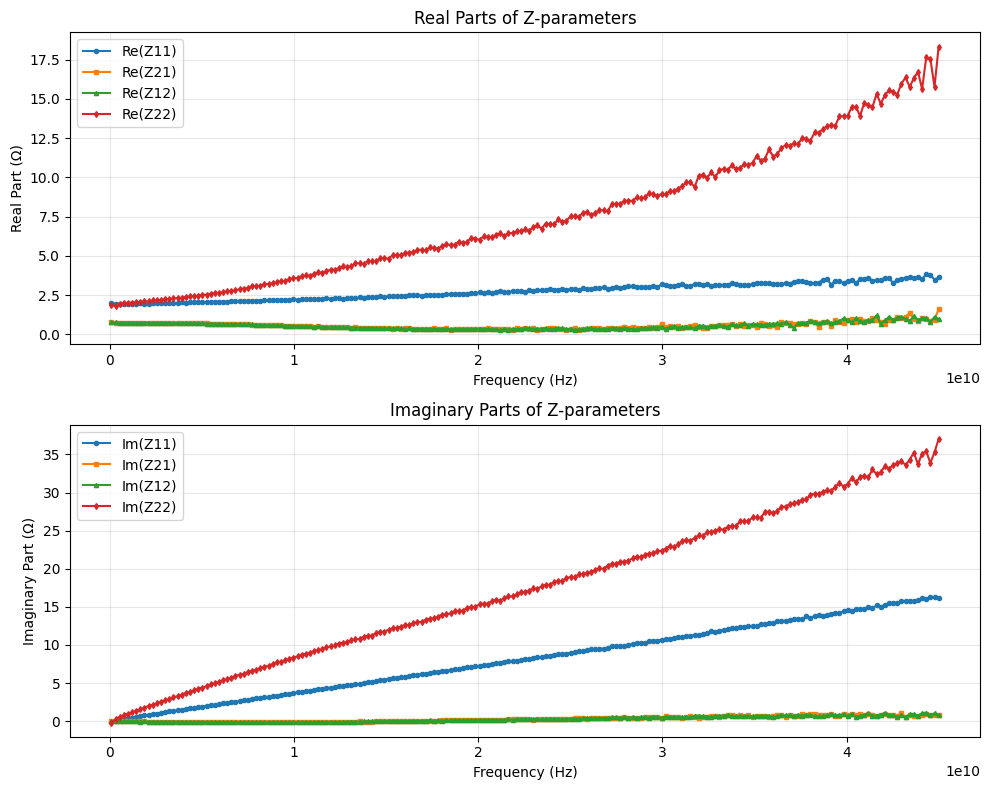

In [20]:
# Plot all real parts of Z-parameters
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Real parts
ax1.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['re(Z11)'], label='Re(Z11)', marker='o', markersize=3)
ax1.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['re(Z21)'], label='Re(Z21)', marker='s', markersize=3)
ax1.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['re(Z12)'], label='Re(Z12)', marker='^', markersize=3)
ax1.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['re(Z22)'], label='Re(Z22)', marker='d', markersize=3)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Real Part (Ω)')
ax1.set_title('Real Parts of Z-parameters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Imaginary parts
ax2.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['im(Z11)'], label='Im(Z11)', marker='o', markersize=3)
ax2.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['im(Z21)'], label='Im(Z21)', marker='s', markersize=3)
ax2.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['im(Z12)'], label='Im(Z12)', marker='^', markersize=3)
ax2.plot(df_Zparams_forward_bias['freq'], df_Zparams_forward_bias['im(Z22)'], label='Im(Z22)', marker='d', markersize=3)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Imaginary Part (Ω)')
ax2.set_title('Imaginary Parts of Z-parameters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# Beräkna Y-parametrar från S-parametrar för pinchoff bias
# Y = (1/Z0) * (1 - S) / (1 + S), men för 2-port används matrisomvandling

# Hämta S-parametrar för pinchoff bias
S11_p = df_Sparams_pinchoff['re(S11)'] + 1j*df_Sparams_pinchoff['im(S11)']
S21_p = df_Sparams_pinchoff['re(S21)'] + 1j*df_Sparams_pinchoff['im(S21)']
S12_p = df_Sparams_pinchoff['re(S12)'] + 1j*df_Sparams_pinchoff['im(S12)']
S22_p = df_Sparams_pinchoff['re(S22)'] + 1j*df_Sparams_pinchoff['im(S22)']

Delta_p = (1 - S11_p)*(1 - S22_p) - S12_p*S21_p

Y0 = 1 / Z0

Y11 = np.array(Y0 * ((1 - S11_p)*(1 - S22_p) + S12_p*S21_p) / Delta_p)
Y22 = np.array(Y0 * ((1 - S22_p)*(1 - S11_p) + S12_p*S21_p) / Delta_p)
Y21 = np.array(-2 * Y0 * S21_p / Delta_p)
Y12 = np.array(-2 * Y0 * S12_p / Delta_p)

df_Yparams_pinchoff = pd.DataFrame({
    'freq': df_Sparams_pinchoff['freq'],
    're(Y11)': Y11.real,
    'im(Y11)': Y11.imag,
    're(Y21)': Y21.real,
    'im(Y21)': Y21.imag,
    're(Y12)': Y12.real,
    'im(Y12)': Y12.imag,
    're(Y22)': Y22.real,
    'im(Y22)': Y22.imag
})


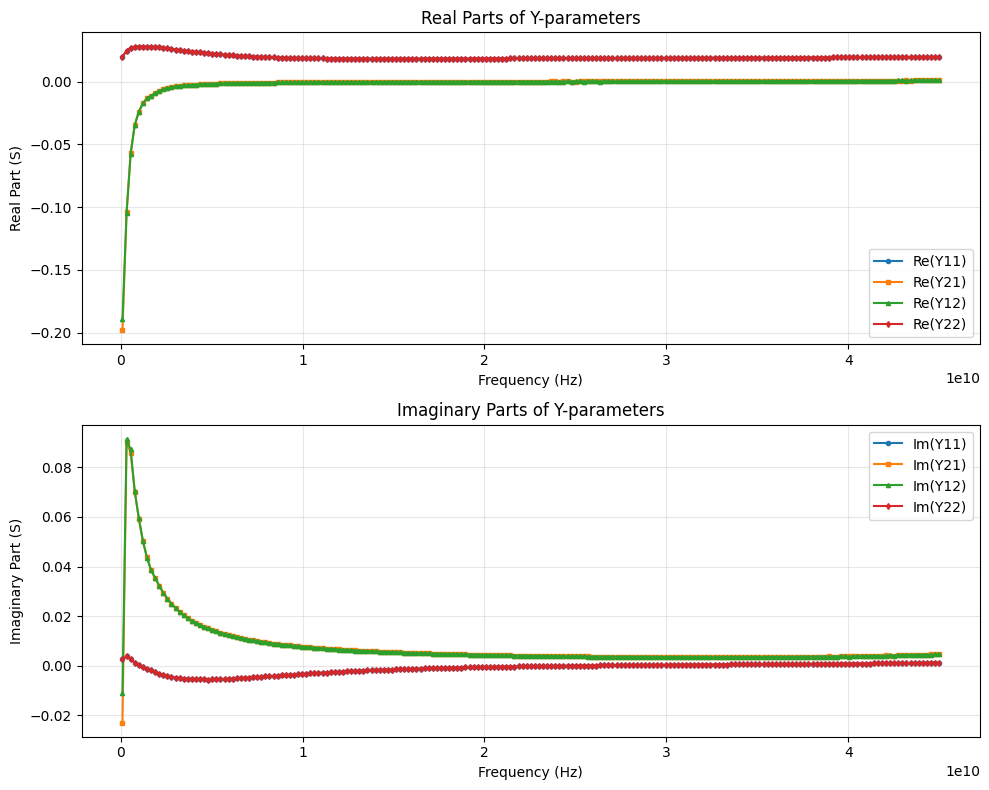

In [26]:
# Plotta alla real- och imaginärdelar av Y-parametrar för pinchoff bias
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Real parts
ax1.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['re(Y11)'], label='Re(Y11)', marker='o', markersize=3)
ax1.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['re(Y21)'], label='Re(Y21)', marker='s', markersize=3)
ax1.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['re(Y12)'], label='Re(Y12)', marker='^', markersize=3)
ax1.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['re(Y22)'], label='Re(Y22)', marker='d', markersize=3)
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Real Part (S)')
ax1.set_title('Real Parts of Y-parameters')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Imaginary parts
ax2.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['im(Y11)'], label='Im(Y11)', marker='o', markersize=3)
ax2.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['im(Y21)'], label='Im(Y21)', marker='s', markersize=3)
ax2.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['im(Y12)'], label='Im(Y12)', marker='^', markersize=3)
ax2.plot(df_Yparams_pinchoff['freq'], df_Yparams_pinchoff['im(Y22)'], label='Im(Y22)', marker='d', markersize=3)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Imaginary Part (S)')
ax2.set_title('Imaginary Parts of Y-parameters')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()